In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
cf=pd.read_csv("../CCF.csv")
cf.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Fraud
0,1,1,2005,9,6,19:18:00,16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No
1,1,1,2005,9,9,08:56:00,224.70,Online Transaction,Digital Delivery Company 7,ONLINE,ND,NaN,4899,No
2,1,1,2005,9,9,16:23:00,145.61,Online Transaction,Travel Booking Company 4,ONLINE,ND,NaN,4722,No
3,1,1,2005,9,9,16:35:00,229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No
4,1,1,2005,9,9,19:55:00,11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No


In [151]:
cf['Fraud']=np.where(cf['Fraud']=='Yes',1,0)
cf.value_counts('Fraud')

Fraud
0    691048
1       872
Name: count, dtype: int64

In [152]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691920 entries, 0 to 691919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User            691920 non-null  int64  
 1   Card            691920 non-null  int64  
 2   Year            691920 non-null  int64  
 3   Month           691920 non-null  int64  
 4   Day             691920 non-null  int64  
 5   Time            691920 non-null  object 
 6   Amount          691920 non-null  float64
 7   Use Chip        691920 non-null  object 
 8   Merchant Name   691920 non-null  object 
 9   Merchant City   691920 non-null  object 
 10  Merchant State  691920 non-null  object 
 11  Zip             614064 non-null  float64
 12  MCC             691920 non-null  int64  
 13  Fraud           691920 non-null  int32  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 71.3+ MB


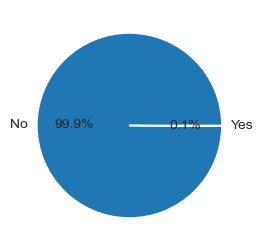

In [153]:
sns.set_style("whitegrid")
plt.figure(figsize=(3,3))
labels=['No','Yes']
plt.pie(cf['Fraud'].value_counts() , labels=labels ,autopct='%1.1f%%')
plt.show()

In [154]:
from sklearn.utils import resample

In [155]:
df_minority=cf[cf['Fraud']==1]
df_majority=cf[cf['Fraud']==0]

In [156]:
df_majority.shape

(691048, 14)

In [157]:
df_minority.shape

(872, 14)

In [158]:
df_majority_down=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=33)

In [159]:
df_majority_down.shape

(872, 14)

In [160]:
df=pd.concat([df_minority,df_majority_down])

In [161]:
df.shape

(1744, 14)

In [162]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Fraud
289,2,1,2012,9,25,17:20:00,159.91,Swipe Transaction,Kelly Discounters,Tegucigalpa,Honduras,NaN,5310,1
1265,3,3,2016,12,11,14:46:00,6.83,Chip Transaction,Rivera Supermarket,Caracas,Venezuela,NaN,5411,1
1266,3,3,2016,12,11,17:05:00,15.00,Online Transaction,Fast Food Chain 15,ONLINE,ND,NaN,5814,1
2442,6,1,2012,4,25,17:02:00,131.83,Swipe Transaction,Peres Amman Wholesale,Amman,Jordan,NaN,5310,1
4198,13,2,2008,6,29,09:45:00,19.17,Swipe Transaction,Department Store 10,Istanbul,Turkey,NaN,5311,1


In [163]:
df.value_counts('Fraud')

Fraud
0    872
1    872
Name: count, dtype: int64

In [164]:
len(df['Merchant State'].unique())

65

In [165]:
df['Merchant State'].value_counts().to_dict()

{'ND': 351,
 'CA': 144,
 'Honduras': 104,
 'Turkey': 103,
 'PA': 79,
 'Bulgaria': 78,
 'NY': 67,
 'GA': 62,
 'TX': 54,
 'FL': 46,
 'Jordan': 38,
 'OH': 36,
 'IL': 36,
 'Mexico': 31,
 'MO': 29,
 'NC': 27,
 'MI': 26,
 'Venezuela': 25,
 'MA': 22,
 'NJ': 21,
 'CO': 19,
 'MD': 18,
 'MN': 18,
 'TN': 17,
 'AL': 16,
 'AZ': 15,
 'VA': 15,
 'SC': 14,
 'India': 14,
 'WA': 14,
 'WI': 14,
 'IN': 13,
 'KS': 13,
 'AR': 12,
 'Russia': 11,
 'CT': 11,
 'South Africa': 10,
 'OK': 9,
 'UT': 9,
 'Guyana': 9,
 'IA': 8,
 'LA': 8,
 'NV': 8,
 'OR': 8,
 'Colombia': 7,
 'NM': 6,
 'HI': 6,
 'MS': 6,
 'ID': 5,
 'KY': 5,
 'WV': 4,
 'MT': 4,
 'DC': 3,
 'DE': 2,
 'Ukraine': 2,
 'Seychelles': 2,
 'SD': 2,
 'ME': 1,
 'RI': 1,
 'Jamaica': 1,
 'France': 1,
 'WY': 1,
 'NH': 1,
 'Madagascar': 1,
 'Dominican Republic': 1}

In [166]:
df_map=df['Merchant State'].value_counts().to_dict()

In [167]:
df['Merchant State']=df['Merchant State'].map(df_map)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1744 entries, 289 to 6719
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            1744 non-null   int64  
 1   Card            1744 non-null   int64  
 2   Year            1744 non-null   int64  
 3   Month           1744 non-null   int64  
 4   Day             1744 non-null   int64  
 5   Time            1744 non-null   object 
 6   Amount          1744 non-null   float64
 7   Use Chip        1744 non-null   object 
 8   Merchant Name   1744 non-null   object 
 9   Merchant City   1744 non-null   object 
 10  Merchant State  1744 non-null   int64  
 11  Zip             960 non-null    float64
 12  MCC             1744 non-null   int64  
 13  Fraud           1744 non-null   int32  
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 197.6+ KB


In [169]:
df['Use Chip'].value_counts().to_dict()

{'Swipe Transaction': 984, 'Chip Transaction': 414, 'Online Transaction': 346}

In [170]:
len(df['Use Chip'].unique())

3

In [171]:
cc=pd.get_dummies(df['Use Chip'],columns=True)

In [172]:
cc['Chip Transaction']=np.where(cc['Chip Transaction']==False,0,1)      
cc['Online Transaction']=np.where(cc['Online Transaction']==False,0,1)
cc['Swipe Transaction']=np.where(cc['Swipe Transaction']==False,0,1)

In [173]:
cc

,Chip Transaction,Online Transaction,Swipe Transaction
289,0,0,1
1265,1,0,0
1266,0,1,0
2442,0,0,1
4198,0,0,1
...,...,...,...
252586,0,0,1
114637,1,0,0
395897,1,0,0
85239,0,0,1


In [174]:
crd=pd.concat([df,cc],axis=1)

In [175]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1744 entries, 289 to 6719
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User                1744 non-null   int64  
 1   Card                1744 non-null   int64  
 2   Year                1744 non-null   int64  
 3   Month               1744 non-null   int64  
 4   Day                 1744 non-null   int64  
 5   Time                1744 non-null   object 
 6   Amount              1744 non-null   float64
 7   Use Chip            1744 non-null   object 
 8   Merchant Name       1744 non-null   object 
 9   Merchant City       1744 non-null   object 
 10  Merchant State      1744 non-null   int64  
 11  Zip                 960 non-null    float64
 12  MCC                 1744 non-null   int64  
 13  Fraud               1744 non-null   int32  
 14  Chip Transaction    1744 non-null   int32  
 15  Online Transaction  1744 non-null   int32  
 16  Swipe Tra

In [176]:
CCD=crd['Zip']=crd['Zip'].fillna(crd['Zip'].median())

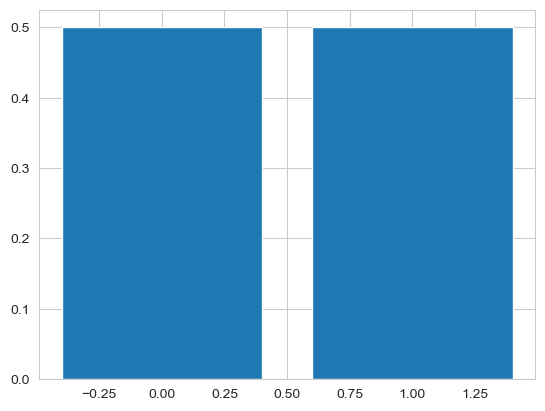

In [177]:
plt.figure()
plt.bar(crd['Fraud'].value_counts(normalize=True).index,
        crd['Fraud'].value_counts(normalize=True).values);

<Axes: xlabel='Fraud', ylabel='count'>

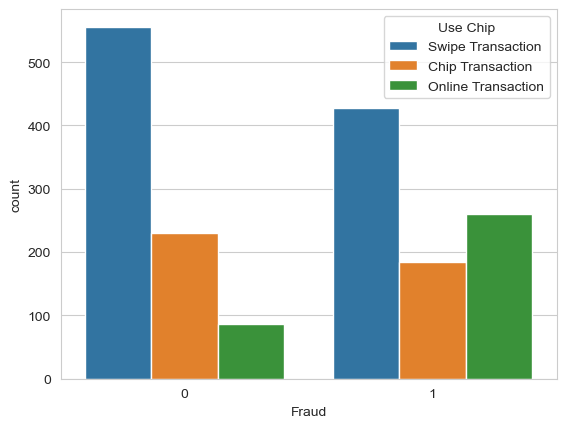

In [178]:
sns.set_style('whitegrid')
sns.countplot(x='Fraud' , hue='Use Chip' , data=crd)

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [180]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1744 entries, 289 to 6719
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User                1744 non-null   int64  
 1   Card                1744 non-null   int64  
 2   Year                1744 non-null   int64  
 3   Month               1744 non-null   int64  
 4   Day                 1744 non-null   int64  
 5   Time                1744 non-null   object 
 6   Amount              1744 non-null   float64
 7   Use Chip            1744 non-null   object 
 8   Merchant Name       1744 non-null   object 
 9   Merchant City       1744 non-null   object 
 10  Merchant State      1744 non-null   int64  
 11  Zip                 1744 non-null   float64
 12  MCC                 1744 non-null   int64  
 13  Fraud               1744 non-null   int32  
 14  Chip Transaction    1744 non-null   int32  
 15  Online Transaction  1744 non-null   int32  
 16  Swipe Tra

In [181]:
crd.describe()

,User,Card,Year,Month,Day,Amount,Merchant State,Zip,MCC,Fraud,Chip Transaction,Online Transaction,Swipe Transaction
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,1025.639908,1.693234,2012.209289,6.123853,15.846330,71.570642,117.103211,48896.596904,5552.090596,0.500000,0.237385,0.198394,0.564220
std,571.838765,1.627517,4.835362,3.552996,8.798725,127.494131,123.602279,22272.941897,853.941122,0.500143,0.425602,0.398905,0.496001
min,2.000000,0.000000,1995.000000,1.000000,1.000000,0.020000,1.000000,1077.000000,3007.000000,0.000000,0.000000,0.000000,0.000000
25%,544.000000,0.000000,2009.000000,3.000000,8.000000,12.137500,26.000000,41184.250000,5300.000000,0.000000,0.000000,0.000000,0.000000
50%,1026.500000,1.000000,2013.000000,6.000000,16.000000,38.305000,67.000000,46666.500000,5411.000000,0.500000,0.000000,0.000000,1.000000
75%,1486.000000,3.000000,2016.000000,9.000000,24.000000,88.755000,144.000000,53106.250000,5813.000000,1.000000,0.000000,0.000000,1.000000
max,1999.000000,8.000000,2020.000000,12.000000,31.000000,3275.300000,351.000000,99353.000000,9402.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
crd.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount ', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Fraud', 'Chip Transaction', 'Online Transaction', 'Swipe Transaction'],
      dtype='object')

In [186]:
x=crd.loc[:,['User','Amount ','Chip Transaction', 'Online Transaction',
       'Swipe Transaction','Merchant State','Zip','Month'
            ]]
y=crd['Fraud']

In [187]:
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [188]:
X_train.shape

(1395, 8)

In [189]:
y_train.shape

(1395,)

In [190]:
X_test.shape

(349, 8)

In [191]:
y_test.shape

(349,)

In [192]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [193]:
model.coef_

array([[-2.65609202e-04,  7.10774712e-03, -4.89302611e-06,
         3.75565122e-06, -1.97305122e-05,  5.46777116e-03,
        -1.41958253e-05, -2.11680344e-04]])

In [194]:
model.intercept_

array([-2.08678893e-05])

In [195]:
train_acc=model.score(X_train,y_train)
print("the accuracy of the training data is {}".format(train_acc*100))

the accuracy of the training data is 67.02508960573476


In [196]:
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 65.61604584527221


In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69       177
           1       0.68      0.57      0.62       172

    accuracy                           0.66       349
   macro avg       0.66      0.65      0.65       349
weighted avg       0.66      0.66      0.65       349



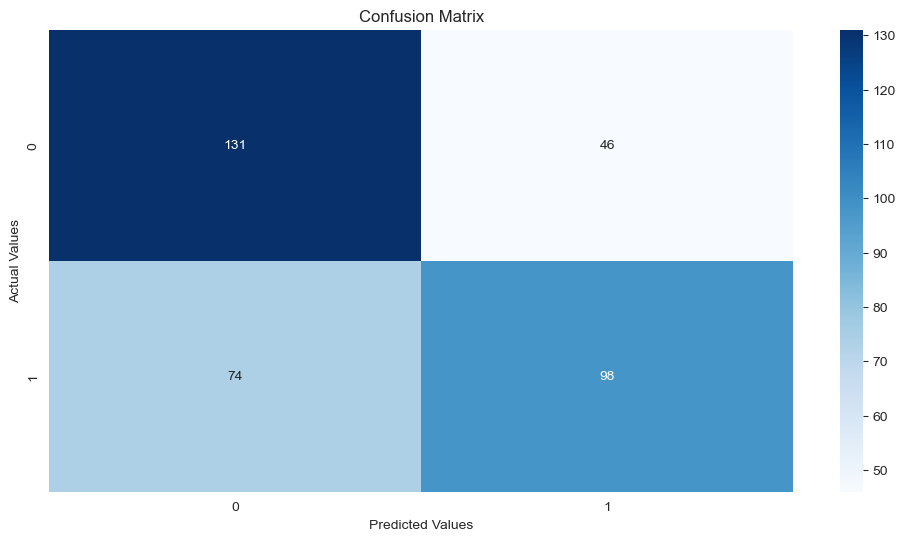

In [198]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [199]:
train_fpr, train_tpr, threshold = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
train_roc_auc = auc(train_fpr, train_tpr)

In [200]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs)
test_roc_auc = auc(test_fpr, test_tpr)

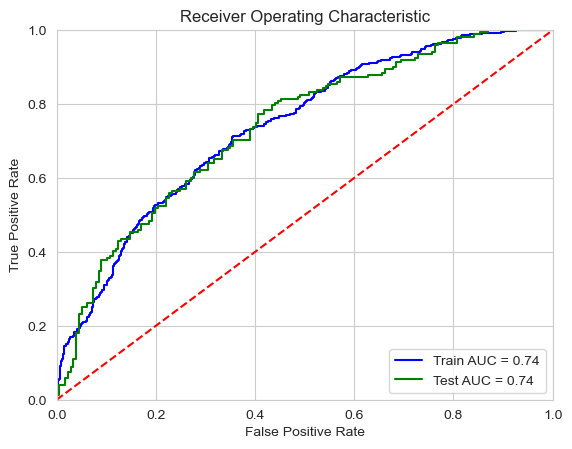

In [201]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [204]:
crd1=crd.loc[:,['User', 'Card', 'Year', 'Month', 'Day', 'Amount ', 'Merchant State', 'Zip', 'MCC',
       'Fraud']]

In [205]:
crd1

,User,Card,Year,Month,Day,Amount,Merchant State,Zip,MCC,Fraud
289,2,1,2012,9,25,159.91,104,46666.5,5310,1
1265,3,3,2016,12,11,6.83,25,46666.5,5411,1
1266,3,3,2016,12,11,15.00,351,46666.5,5814,1
2442,6,1,2012,4,25,131.83,38,46666.5,5310,1
4198,13,2,2008,6,29,19.17,103,46666.5,5311,1
...,...,...,...,...,...,...,...,...,...,...
252586,733,0,2005,1,4,171.76,36,60605.0,8021,0
114637,339,1,2019,6,5,86.95,67,13606.0,5812,0
395897,1122,0,2018,1,1,57.13,67,11772.0,5812,0
85239,262,6,2014,1,20,59.52,46,34953.0,5311,0


In [206]:
scaler=StandardScaler()
selected_feat = list(set(crd1.columns.tolist()) - set(['Fraud']))

scaler.fit(crd1[selected_feat])
scaled_features = scaler.transform(crd1[selected_feat])
 
wc_feat = pd.DataFrame(scaled_features, columns=selected_feat)
wc_feat.head()


,Amount,Day,Card,User,Zip,Year,Month,MCC,Merchant State
0,0.693088,1.040639,-0.426068,-1.790598,-0.100155,-0.043295,0.809731,-0.283579,-0.106041
1,-0.507939,-0.550957,0.803150,-1.788849,-0.100155,0.784181,1.654331,-0.165270,-0.745372
2,-0.443839,-0.550957,0.803150,-1.788849,-0.100155,0.784181,1.654331,0.306795,1.892877
3,0.472780,1.040639,-0.426068,-1.783601,-0.100155,-0.043295,-0.597936,-0.283579,-0.640165
4,-0.411122,1.495381,0.188541,-1.771357,-0.100155,-0.870772,-0.034869,-0.282408,-0.114134


In [207]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

<Axes: >

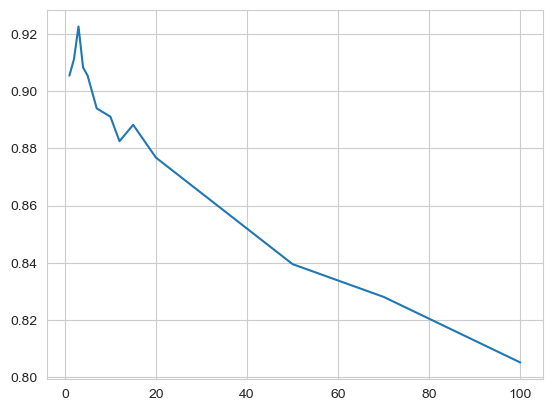

In [208]:
test_auc_list = []
k_list = [1, 2, 3, 4, 5, 7, 10, 12, 15, 20, 50, 70, 100]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_auc_list.append(accuracy_score(y_test, y_pred))

sns.lineplot(x=k_list, y=test_auc_list)

In [209]:
train_acc = knn.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 79.92831541218638


In [210]:
y_pred = knn.predict(X_test)
probs = knn.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 80.51575931232091


In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       177
           1       0.78      0.84      0.81       172

    accuracy                           0.81       349
   macro avg       0.81      0.81      0.81       349
weighted avg       0.81      0.81      0.80       349



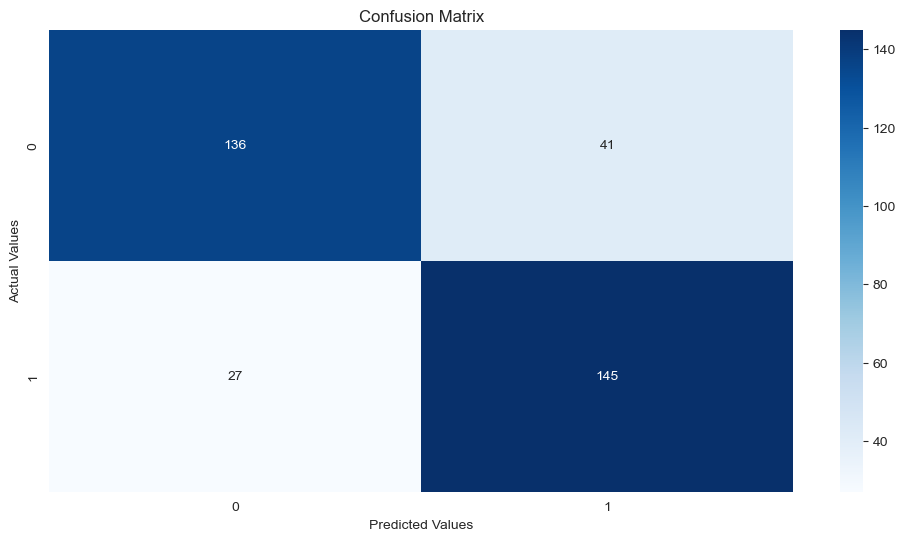

In [212]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [213]:
train_fpr, train_tpr, threshold = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
train_roc_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs)
test_roc_auc = auc(test_fpr, test_tpr)

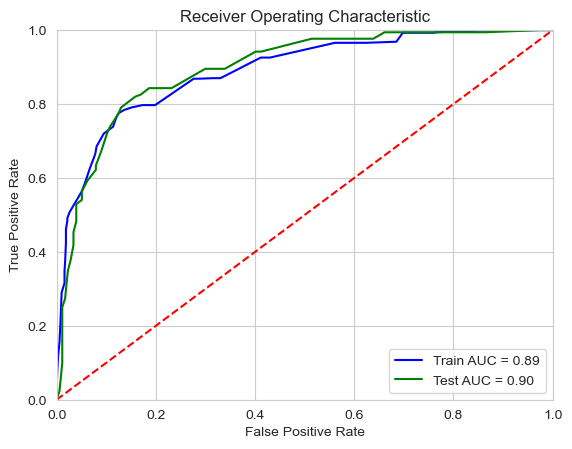

In [214]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()